# Talktorial 10

# Binding site similarity and off-target prediction

#### Developed in the CADD seminars 2017 and 2018, AG Volkamer, Charité/FU Berlin 

Angelika Szengel, Marvis Sydow, Richard Gowers, Jaime Rodríguez-Guerra and Dominique Sydow

<!-- TODO: This disclaimer might not be needed -->
**Note**: Please run this notebook cell by cell. Running all cells in one is possible also, however, a few PyMol images might not turn out as intended.

## Aim of this talktorial

In this talktorial, we use the structural similarity of whole proteins and binding sites to predict off-targets, i.e. proteins that are not intended targets of a drug, which may lead to unwanted side effects or enable desired alternate applications of a drug (drug repositioning).
We discuss the main steps for binding site comparison and implement a basic method, i.e. the geometrical variation between structures (the root mean square deviation of two structures).

## Learning goals

### Theory

* Off-target proteins
* Computational off-target prediction: binding site comparison
* Pairwise RMSD as simple measure for similarity
* Imatinib, a tyrosine kinase inhibitor

### Practical

* Load and visualize the ligand of interest (Imatinib/STI)
* Get all protein-STI complexes from the PDB
  * Query the PDB
  * Filter the PDB data set
  * Save the filtered PDB IDs
* Visualize the PDB structures
* Align the PDB structures (whole protein)
* Get pairwise RMSD (whole protein)
* Align the PDB structures (binding site)
* Get pairwise RMSD (binding site)


## References

Binding site comparison: 

* Binding site comparison reviews: 
([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites)) 
and 
([<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078))
<!-- TODO: This might not be needed -->
* Documentation on PyMol `align` command 
([PyMolWiki: `align`](https://pymolwiki.org/index.php/Align))
* Wikipedia article on root mean square deviation (RMSD) 
([Wikipedia: RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)) and structural superposition ([Wikipedia: structural superposition](https://en.wikipedia.org/wiki/Structural_alignment))
* Structural superposition ([Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub))

Imatinib:  

* Review on Imatinib 
([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41))
* Promiscuity of imatinib 
([<i>J. Biol.</i> (2009), <b>8</b>, 10.1186/jbiol134](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689438/))
* ChEMBL information on Imatinib 
([ChEMBL: Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941))
* PDB information on Imatinib 
([PDB: STI](https://www3.rcsb.org/ligand/STI))
* Side effects of Imatinib
([Drugs.com: Imatinib](https://www.drugs.com/cdi/imatinib.html))
* Side effects of Imatinib
 ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>, 10.1186/1472-6807-9-7](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7))

## Theory

### Off-target proteins

An off-target can be any protein which interacts with a drug or (one of) its metabolite(s) without being the designated target protein. 
The molecular reaction caused by the off-target can lead to unwanted side effects, ranging from a rather harmless to extremely harmful impact. 
Off-targets mainly occur because on- and off-targets share similar structural motifs with each other in their binding site and therefore can bind similar ligands. 

### Computational off-target prediction: binding site comparison

Computation-aided prediction of potential off-targets is aimed at minimizing the risk of developing potentially dangerous substances for medical treatment.
There are several algorithmic approaches to assess binding site similarity but they always consist of three main steps:

1. **Binding site encoding**: binding sites are encoded using different descriptor techniques and stored in a target database.
2. **Binding site comparison**: a query binding site is compared with the target database, using different similarity measures.
3. **Target ranking**: targets are ranked based on a suitable scoring approach.

For detailed information on different similarity measures and existing tools, we refer to two excellent reviews on binding site comparison ([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites) and [<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078)).

<img src="images/binding_site_comparison_steps.png" align="above" alt="Image cannot be shown" width="700">
<div align="center"> Figure 1: Main steps of binding site comparison methods (figure by Dominique Sydow).</div>

### Pairwise RMSD as simple measure for similarity

A simple and straightforward method for scoring the similarity is to use the calculated root mean square deviation (RMSD), which is the square root of the mean of the square of the distances between the atoms of two aligned structures ([Wikipedia: RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)). 


In order to find the respective atoms that are compared between two structures, they need to be aligned first based on sequence-based or sequence-independent alignment algorithms ([Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub)).




### Imatinib, a tyrosine kinase inhibitor

Kinases transfer a phosphate group from ATP to proteins, and thereby regulate various cellular processes such as signal transduction, metabolism, and protein regulation.
If these kinases are constitutively active (due to genomic mutations), they can distort regulation processes and cause cancer.
An example for cancer treatment is Imatinib ([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41)), a small molecule tyrosine kinase inhibitor used to treat cancer, more specifically chronic myeloid leukaemia (CML) and gastrointestinal stromal tumour (GIST). 

Imatinib was shown to be not entirely specific and to target tyrosine kinases other than its main target. This was used for drug repositioning, i.e. Imatinib was approved for alternate cancer types, ([<i>J. Biol.</i> (2009), <b>8</b>, 10.1186/jbiol134](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689438/)), however can also show unwanted side effects such as signs of an allergic reaction, infection, bleeding, or headache ([Drugs.com: Imatinib](https://www.drugs.com/cdi/imatinib.html)).

## Practical

In the following, we will fetch and filter PDB structures that bind Imatinib. We will investigate the structure similarity of Imatinib-binding proteins (those with a solved protein structure). 
The similarity measure used is a pairwise RMSD calculation (as a simple similarity measure), in order to show that this simple method can be used as an initial test for potential off-targets.

In [15]:
import os
import pprint
import pickle
import glob
import time

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem
IPythonConsole.ipython_useSVG=True

import nglview as nv

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pypdb import *
from biopandas.pdb import PandasPdb

### Load and visualize the ligand of interest (Imatinib/STI)

The SMILES format for Imatinib (common abbreviation: STI) can be retrieved from e.g. the ChEMBL database 
([ChEMBL: Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)) 
or the PDB database by its common abbreviation STI 
([PDB: STI](https://www3.rcsb.org/ligand/STI)). 
We simply copy the string from the "Isomeric SMILES" entry of the Chemical Component Summary table, and load the ligand here by hand.

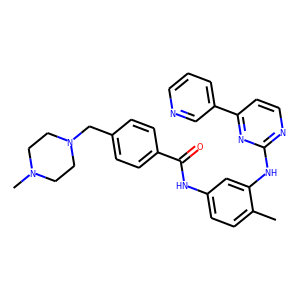

In [2]:
sti = Chem.MolFromSmiles('CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1')
Draw.MolToImage(sti)

In order to inspect the 3D structure of STI, we use the open source tool PyMol (see introduction in talktorial T8). 
Before we can view STI in PyMol, we need to compute its 3D coordinates.

First, we add hydrogen atoms to the molecule, which are not always explicitly denoted in the SMILES format.
Second, we use the distance geometry to obtain initial coordinates for the molecule and optimize the structure of the molecule using the force field UFF (Universal Force Field).

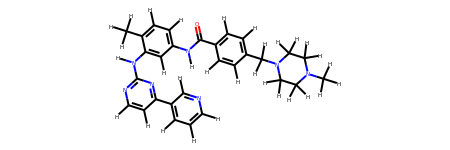

In [3]:
sti_mol = Chem.AddHs(sti)
sti_mol

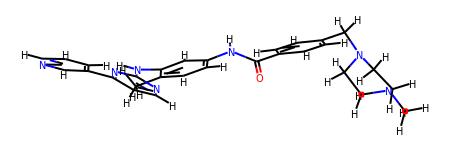

In [4]:
AllChem.EmbedMolecule(sti_mol)
AllChem.UFFOptimizeMolecule(sti_mol)
sti_mol

Now, we are ready to roll in nglview! 


In [6]:
v = nv.show_rdkit(sti_mol)
v

NGLWidget()

In [ ]:
v.render_image()

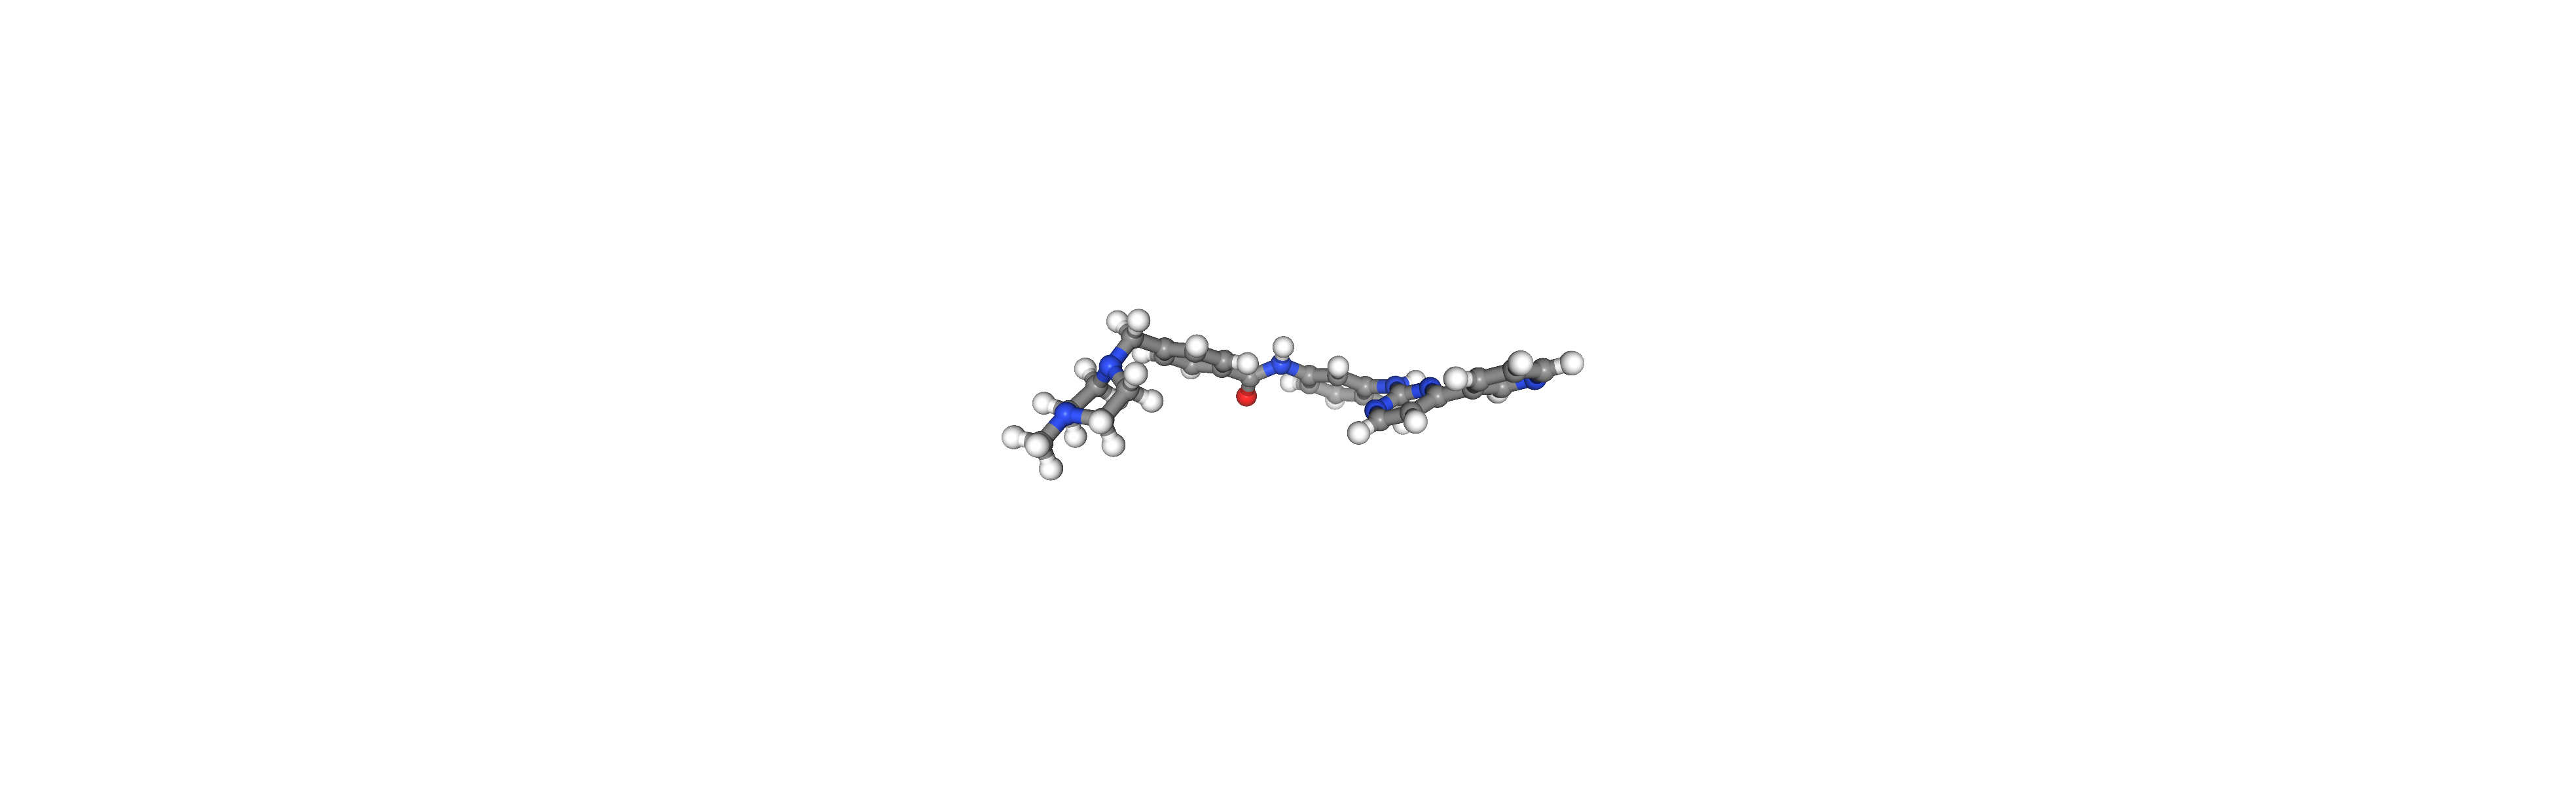

In [8]:
v._display_image()

### Get all protein-STI complexes from the PDB

We can look up Imatinib/STI in open databases like the PDB and search for proteins which are reported targets. In the PDB, Imatinib is usually abbreviated by STI. We will search for both terms and merge the results in the following.

#### Query the PDB

First, we retrieve all proteins from the PDB that bind the ligand of interest (STI).

In [9]:
search_dict = make_query('STI')  # Query PDB for proteins bound to the ligand STI
found_pbd_ids = do_search(search_dict)

print(found_pbd_ids)
print("\nNumber of structures connected with STI in the PDB:", len(found_pbd_ids))

['1AVU', '1AVW', '1AVX', '1BA7', '1FPU', '1IEP', '1M52', '1OPJ', '1R8N', '1R8O', '1T45', '1T46', '1XBB', '2BEA', '2BEB', '2DRE', '2ESU', '2ET2', '2HYY', '2OIQ', '2PL0', '3EA7', '3EA8', '3FW1', '3GVU', '3HEC', '3I2A', '3I2X', '3K5V', '3M3V', '3MS9', '3MSS', '3OEZ', '3PYY', '3QQM', '3S8J', '3S8K', '4BKJ', '4CSV', '4GCN', '4GCO', '4H9W', '4HA2', '4R7I', '4TLP', '5FNW', '5FNX', '5FZU', '5FZY', '5FZZ', '5G00', '5MQT', '6HD4', '6HD6', '6I0I', '6JOL', '6KTN', '6NPE', '6NPU', '6NPV', '6OTU', '6WE5']

Number of structures connected with STI in the PDB: 62


Note that the query results can differ depending on the term used for the query ligand (here: Imatinib). 

In [10]:
search_dict2 = make_query('Imatinib')  # Query PDB for proteins bound to the ligand Imatinib
found_pbd_ids2 = do_search(search_dict2)

print(found_pbd_ids2)
print("\nNumber of structures connected with Imatinib in the PDB:", len(found_pbd_ids2))

['1IEP', '1M52', '1OPJ', '1T46', '1XBB', '2F4J', '2GQG', '2HYY', '2OIQ', '2PL0', '2XYN', '3EL7', '3EL8', '3FW1', '3G0E', '3G0F', '3G6G', '3G6H', '3GVU', '3HEC', '3HEG', '3K5V', '3MS9', '3MSS', '3OEZ', '3PYY', '3QLF', '3QLG', '4BKJ', '4CSV', '4R7I', '5MQT', '6HD4', '6HD6', '6JOL', '6KTM', '6KTN', '6NPE', '6NPU', '6NPV']

Number of structures connected with Imatinib in the PDB: 40


We merge both query results and keep only unique entries.

In [11]:
pdb_ids = list(set(found_pbd_ids + found_pbd_ids))
print("Number of structures connected with STI/Imatinib in the PDB:", len(pdb_ids))

Number of structures connected with STI/Imatinib in the PDB: 62


#### Filter the PDB data set

We retrieve meta information on the PDB structures using the `pypdb` function `get_entity_info`, in order to filter the data set based on the following criteria:

1. Filter by experimental method (`xray`).
2. Filter by resolution (equal or lower than 3 &#8491;).
3. Retain only PDB structures with a single chain (for simplicity).
4. Retain only Imatinib-bound structures (e.g. some PDB structures are returned that are associated with Imatinib but not bound to it).
5. Retain only PDB IDs deposited before 2019 (data set resource at the time of the talktorial publication).

For more info on how to query the PDB see **talktorial 8**.

In [12]:
# Get meta information from the PDB
entity_info = []
for i in pdb_ids:
    entity_info.append(get_entity_info(i))
entity_info[0]

{'Method': {'@name': 'xray'},
 'Entity': {'@id': '1',
  '@type': 'protein',
  'Chain': [{'@id': 'A'}, {'@id': 'B'}]},
 'structureId': '1OPJ',
 'bioAssemblies': '2',
 'release_date': 'Tue Apr 08 00:00:00 PDT 2003',
 'resolution': '1.75'}

In [13]:
# Transform list to DataFrame
entity_info_pd = pd.DataFrame(entity_info)
a = [int(i.split()[5]) for i in entity_info_pd["release_date"].tolist()]
entity_info_pd.head()

,Method,Entity,structureId,bioAssemblies,release_date,resolution
0,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",1OPJ,2,Tue Apr 08 00:00:00 PDT 2003,1.75
1,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",2HYY,4,Tue Jan 16 00:00:00 PST 2007,2.40
2,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",2OIQ,2,Tue Mar 20 00:00:00 PDT 2007,2.07
3,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",2DRE,1,Tue Dec 26 00:00:00 PST 2006,2.00
4,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",4BKJ,2,Wed May 22 00:00:00 PDT 2013,1.70


In [14]:
# 1. Filter by experimental method
entity_info_pd = entity_info_pd[entity_info_pd["Method"] == {'@name': 'xray'}]

# 2. Filter by resolution
entity_info_pd = entity_info_pd[entity_info_pd["resolution"].astype(float) <= 3.0]

# 3. Retain only structures with a single chain (for simplicity)
entity_info_pd = entity_info_pd[[type(i) == dict for i in entity_info_pd["Entity"]]]
entity_info_pd = entity_info_pd[[type(i["Chain"]) == dict for i in entity_info_pd["Entity"]]]

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  24


In the following, we will use a package called `BioPandas`, which provides useful functions to load molecular structures of biological macromolecules (from PDB and MOL2 files) in pandas DataFrames. We will use the `PandasPdb` object to facilitate our work with PDB files.

In [16]:
# 4. Retain only Imatinib-bound structures

def check_if_ligand_present(pdb_id, ligand_name):
    ppdb = PandasPdb().fetch_pdb(pdb_id)  # Fetch PDB (atom info, coordinates)
    return sum(ppdb.df["HETATM"]["residue_name"] == ligand_name) > 0  # Check for existence of STI entries

entity_info_pd = entity_info_pd[[check_if_ligand_present(pdb_id, "STI") for pdb_id in pdb_ids]]  # Apply function

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  9


In [17]:
# 5. Retain only PDB IDs deposited before 2019

entity_info_pd = entity_info_pd[[int(i.split()[5]) < 2019 for i in entity_info_pd["release_date"].tolist()]]

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  8


In [18]:
# 6. After manual visual inspection remove 3GVU (contains 2x STI: not feasable for automatic workflow below)
pdb_ids.remove("3GVU")

In [19]:
pdb_ids
#pdb_ids = random.shuffle(pdb_ids)  # In case you would like to change the order of IDs

['3HEC', '1XBB', '1T46', '3FW1', '4CSV', '4R7I', '2PL0']

#### Save the filtered PDB IDs

We save the PDB IDs of the filtered data set for further analysis (we will use PyMol python scripts later on that will process PDB IDs according to this file).

__NOTE__: This might not be needed after the refactor

In [20]:
pickle.dump(pdb_ids, open("../data/T10/pdb_ids.p", "wb"))

### Visualize the PDB structures

First, we load all structures to PyMol for visual inspection of the 3D structure of the protein data set. 

Besides the visualization here in this Jupyter notebook in form of fixed images of a PyMol frame, it is advised to also view and interact with the structures in 3D directly within the PyMol application, which should be opened and manipulated in parallel to this talktorial. 

In [1]:
pbd_ids

In [3]:
import nglview as nv
w = nv.NGLWidget()
for pdb_id in pdb_ids:
    w.add_pdbid(pdb_id)
w

_ColormakerRegistry()

NGLWidget()

In [4]:
w.render_image()

Image(value=b'', width='99%')

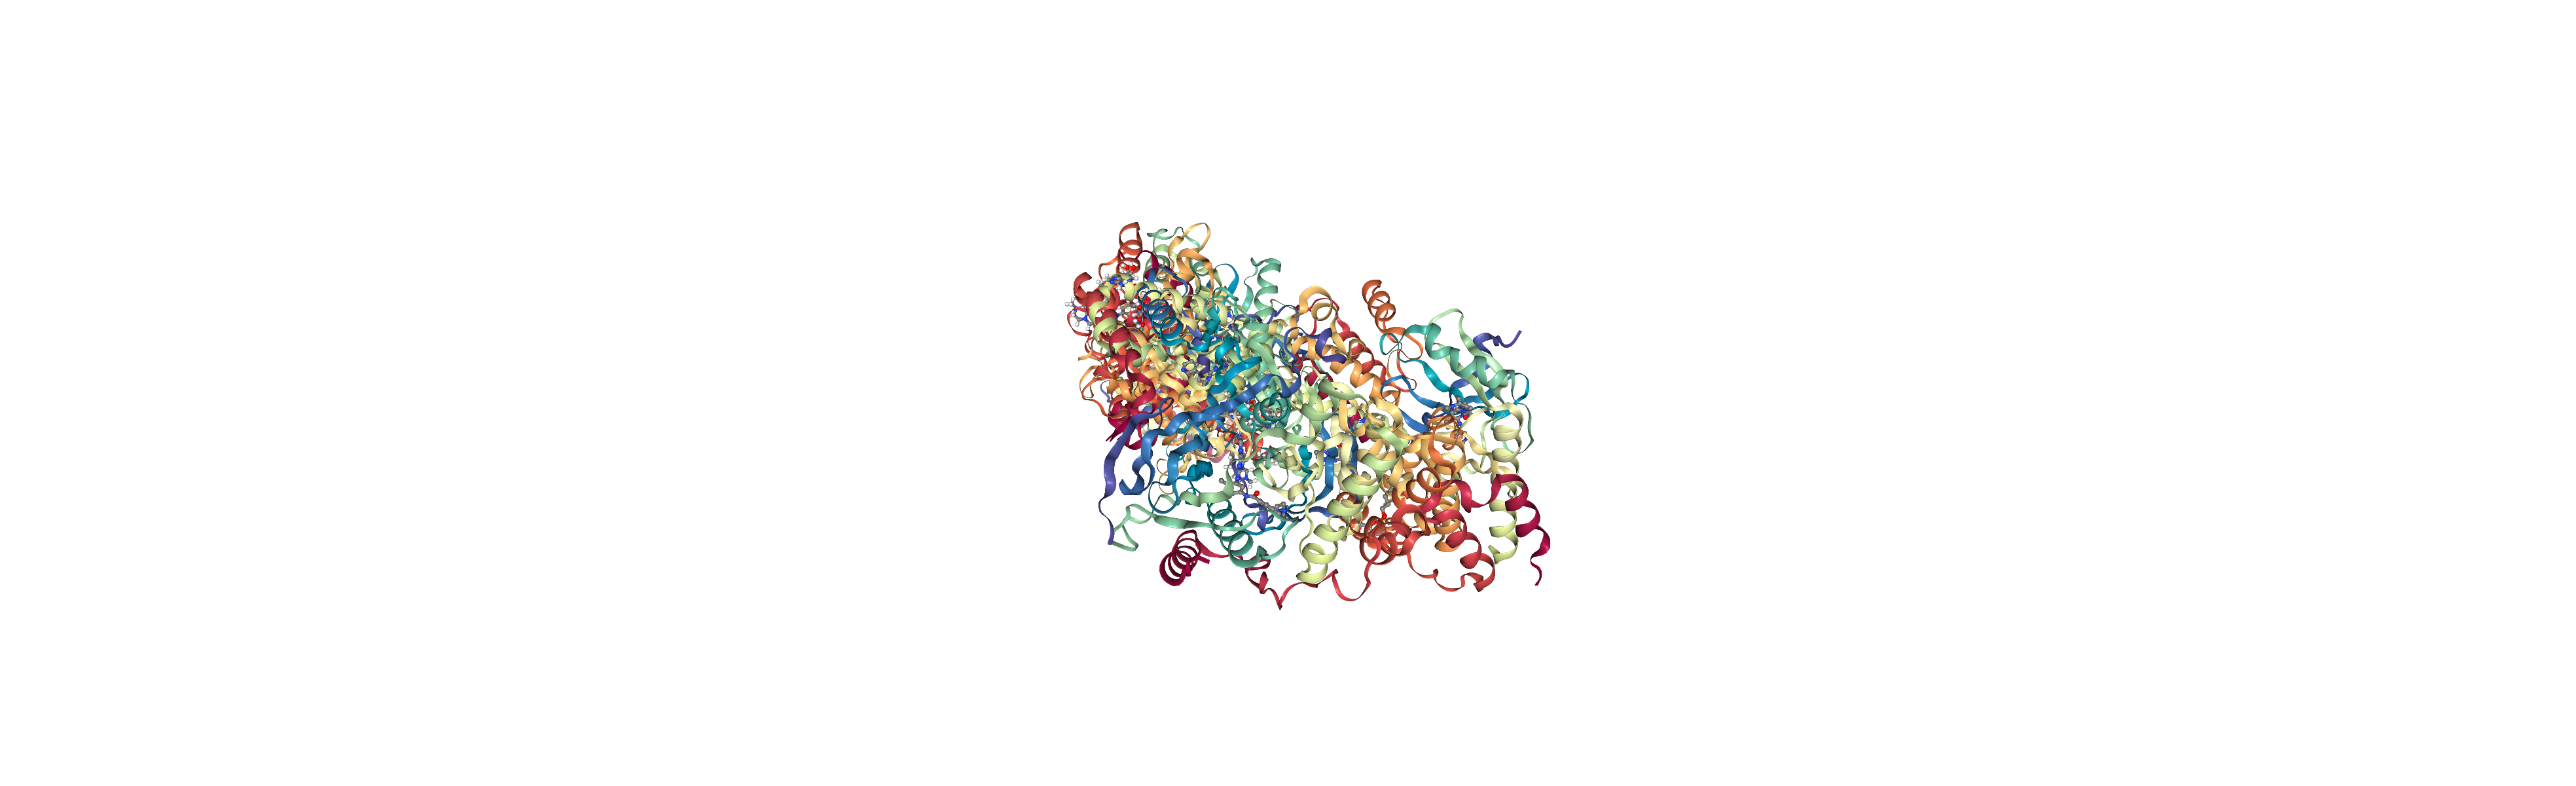

In [5]:
w._display_image()

Though this image is beautifully colorful and curly, it is not informative yet. We align the structures to each other in the next step.

### Align the PDB structures (whole protein)

We will use one of our packages, `superposer`, to guide the structural alignment of the different proteins. The approach we will use is based on superposition guided by sequence alignment provided matched residues. There are other methods in the package, but this simple one will be enough to showcase some similarities.

Note: This approach biases the analysis towards structures with similar sequences. For an automated workflow (where we do not know the sequence or structural similarity of protein pairs) a solution could be to calculate the RMSD based on all three measures and retain the best for further analysis.

First, we show the alignment of all structures to the first structure in the list `pdb_ids`.

__Note:__ `superposer` is still in alpha stage, so we have to install it manually while there's no `conda` package available. Enable the following cell to proceed manually.

In [111]:
from superposer import align, METHODS
from superposer.core import Structure

In [112]:
# download pdbid
structures = [Structure.from_pdbid(pdb_id) for pdb_id in pdb_ids]
# strip solvent etc
proteins = [Structure.from_atomgroup(s.select_atoms('protein')) for s in structures]

In [113]:
results = align(proteins, method=METHODS["mda"])

In [114]:
view = nv.NGLWidget()
for protein in proteins:
    view.add_component(protein.atoms)
view

NGLWidget()

In [ ]:
view.render_image()

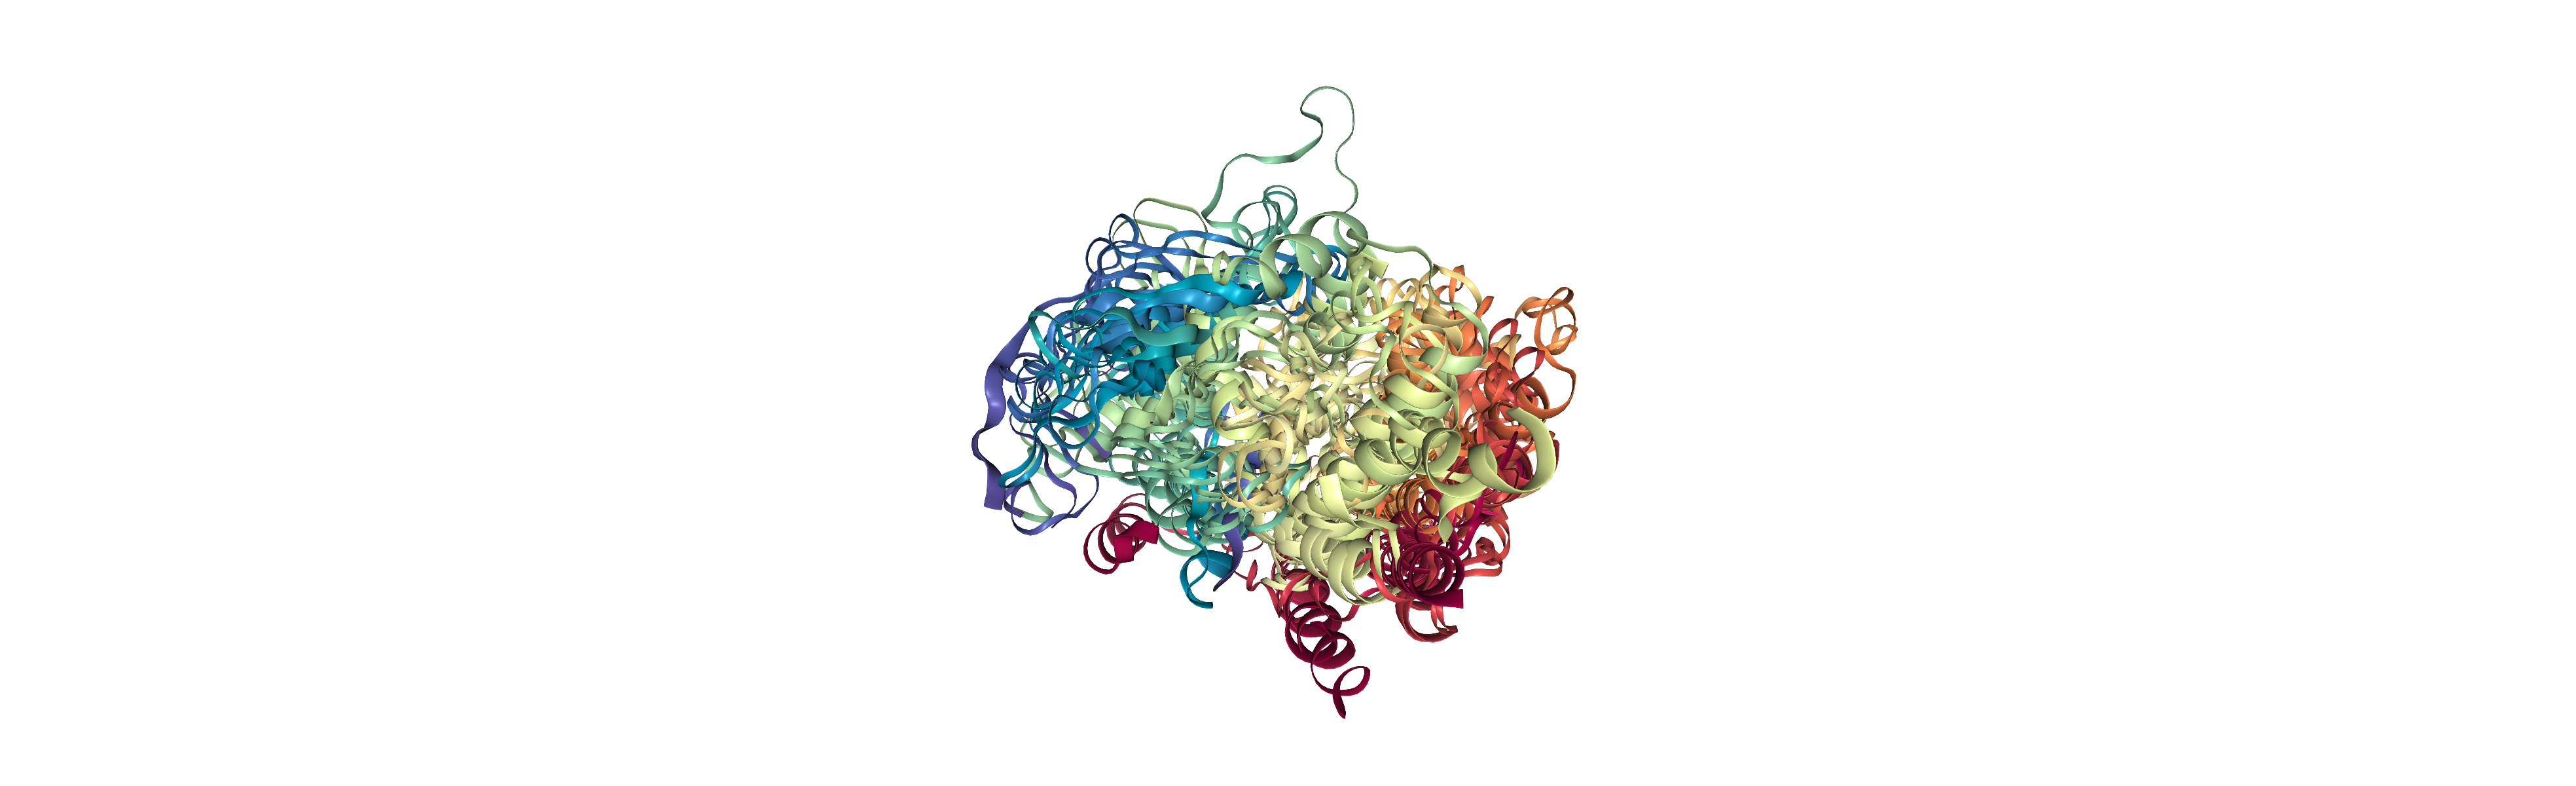

In [116]:
view._display_image()

The structural alignment for many e.g. helices is high, whereas lower or poor for others. `superposer` returns several scores for the alignment under the `scores` key.

In [117]:
from MDAnalysis.analysis import rms
from superposer.superposition.mda import MDAnalysisAligner

def calc_rmsd(A, B):
    aligner = MDAnalysisAligner()
    selection, _ = aligner.matching_selection(A, B)
    A = A.select_atoms(selection["reference"])
    B = B.select_atoms(selection["mobile"])
    return rms.rmsd(A.positions, B.positions, superposition=False)

def calc_rmsd_matrix(structures, names):
    values = {name: {} for name in names}
    for A, name_i in zip(structures, names):
        for B, name_j, in zip(structures, names):
            values[name_i][name_j] = calc_rmsd(A, B)
    df = pd.DataFrame.from_dict(values)
    return df

In [119]:
rmsd_matrix = calc_rmsd_matrix(proteins, pdb_ids)
rmsd_matrix

,3HEC,1XBB,1T46,3FW1,4CSV,4R7I,2PL0
3HEC,0.000000,17.201069,21.656061,23.671867,12.606877,20.531278,16.091148
1XBB,17.201069,0.000000,12.592919,22.235981,7.776430,11.881647,7.521946
1T46,21.656061,12.592919,0.000000,21.607311,14.553660,3.212093,14.063316
3FW1,23.671867,22.235981,21.607311,0.000000,22.469151,21.927079,22.797072
4CSV,12.606877,7.776430,14.553660,22.469151,0.000000,13.956163,3.664537
4R7I,20.531278,11.881647,3.212093,21.927079,13.956163,0.000000,13.501442
2PL0,16.091148,7.521946,14.063316,22.797072,3.664537,13.501442,0.000000


We visualize the results of this RMSD refinement as heatmap.

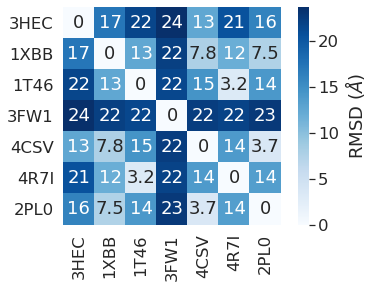

In [120]:
# make sure matplotlib version >= 3.1.2; otherwise you'll get Y-cropped heatmaps
sns.heatmap(rmsd_matrix, linewidths=0, annot=True, square=True, cbar_kws={"label": "RMSD ($\AA$)"}, cmap="Blues");

We cluster the heatmap in order to see protein similarity based on the RMSD refinement.

In [121]:
def plot_clustermap(rmsd, title):
    g = sns.clustermap(rmsd, linewidths=1, annot=True, cbar_kws={"label": "RMSD ($\AA$)"}, cmap="Blues")
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    sns.set(font_scale=1.5)
    
    # Save plot - use bbox_inches to include text boxes:
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig(f"../data/T10/bsc_{title}.png", dpi=300, bbox_inches="tight", transparent=True)
    plt.show()
    return plt.gcf()

/home/jaime/.conda/envs/teachopencadd/lib/python3.6/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


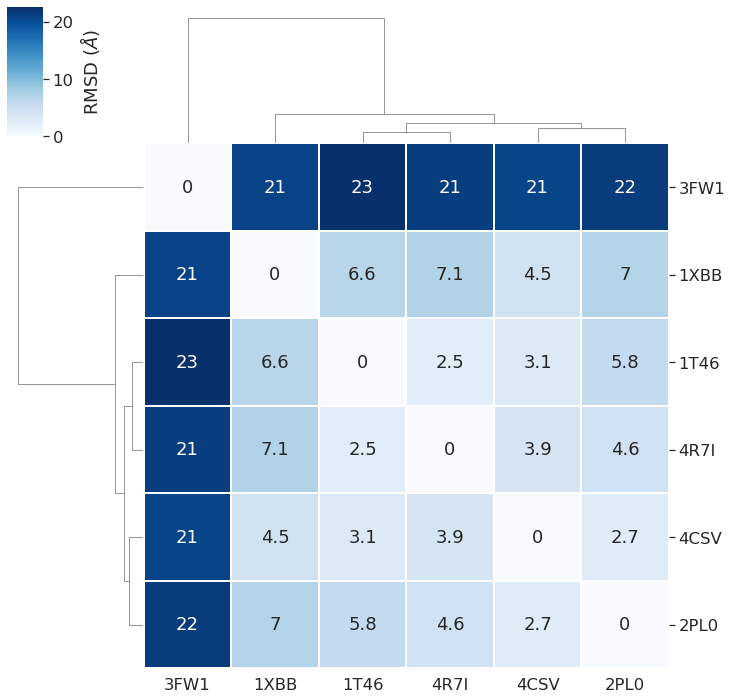

<Figure size 432x288 with 0 Axes>

In [89]:
plot_clustermap(rmsd_matrix, "protein");

The RMSD comparison shows that one protein differs from the other proteins, i.e. 3FW1 (as already discussed based on the visual 3D inspection of the alignment and on the number of aligned residues).

Proteins are classified by the chemical reactions they catalyze with so called EC (Enzyme Commission) numbers, which we will use here to check the enzymatic groups the proteins belong to.

In [123]:
# Get EC numbers for PDB IDs from PDB
pdb_all_info = [get_all_info(pdb_id) for pdb_id in pdb_ids]
ec_numbers = [i["polymer"]["enzClass"]["@ec"] for i in pdb_all_info]
target_set = {"pdb_id": pdb_ids,
              "ec_number": ec_numbers}
target_set = pd.DataFrame(target_set)
target_set

,pdb_id,ec_number
0,3HEC,2.7.11.24
1,1XBB,2.7.10.2
2,1T46,2.7.10.1
3,3FW1,1.10.5.1
4,4CSV,2.7.10.2
5,4R7I,2.7.10.1
6,2PL0,2.7.10.2


We can see that 3FW1, the human quinone reductase 2 (NQO2), belongs to EC class 1, i.e. oxidoreductases, whereas the other proteins belong to class 2.7, i.e. phosphorus transferases, which contain the tyrosine kinases (EC 2.7.10.2), the designated targets for Imatinib. 3FW1 is a reported off-target "with potential implications for drug design and treatment of chronic myelogenous leukemia in patients" ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>, 10.1186/1472-6807-9-7](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7)).



### Align PDB structures (binding sites)

So far we have used the whole protein structure for the alignment and RMSD refinement. However, the ligand binds only at the protein binding site and therefore the similarity of binding sites rather than of whole protein structures is a more putative basis for off-target prediction. 

We define a binding site of a protein by selecting all residues that are within 10 &#8491; of any ligand atom. These binding site residues are used for alignment and only their C&#593; atoms (protein backbone) are used for the RMSD refinement. Here, we show the alignment of all structures to the first structure in the list `pdb_ids`.

In [124]:
binding_sites = [Structure.from_atomgroup(s.select_atoms("same residue as (resname STI or (around 10 resname STI))")) 
                 for s in structures]

In [125]:
view = nv.NGLWidget()
for binding_site in binding_sites:
    view.add_component(binding_site.atoms)
view

NGLWidget()

In [129]:
results_binding_sites = align(binding_sites, method=METHODS["mda"])

In [130]:
view = nv.NGLWidget()
for binding_site in binding_sites:
    view.add_component(binding_site.atoms)
view

NGLWidget()

### Get pairwise RMSD (binding sites)

In [131]:
rmsd_matrix_bs = calc_rmsd_matrix(binding_sites, pdb_ids)
rmsd_matrix_bs

,3HEC,1XBB,1T46,3FW1,4CSV,4R7I,2PL0
3HEC,0.000000,12.312706,9.768832,14.955582,4.583946,5.700340,6.155734
1XBB,12.312706,0.000000,11.111881,13.477687,10.743658,10.523855,11.662433
1T46,9.768832,11.111881,0.000000,15.308169,5.851501,2.684484,4.338103
3FW1,14.955582,13.477687,15.308169,0.000000,13.900750,14.453825,11.338647
4CSV,4.583946,10.743658,5.851501,13.900750,0.000000,5.185894,4.024773
4R7I,5.700340,10.523855,2.684484,14.453825,5.185894,0.000000,3.997050
2PL0,6.155734,11.662433,4.338103,11.338647,4.024773,3.997050,0.000000


We show the clustered heatmap for the RMSD results.

/home/jaime/.conda/envs/teachopencadd/lib/python3.6/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


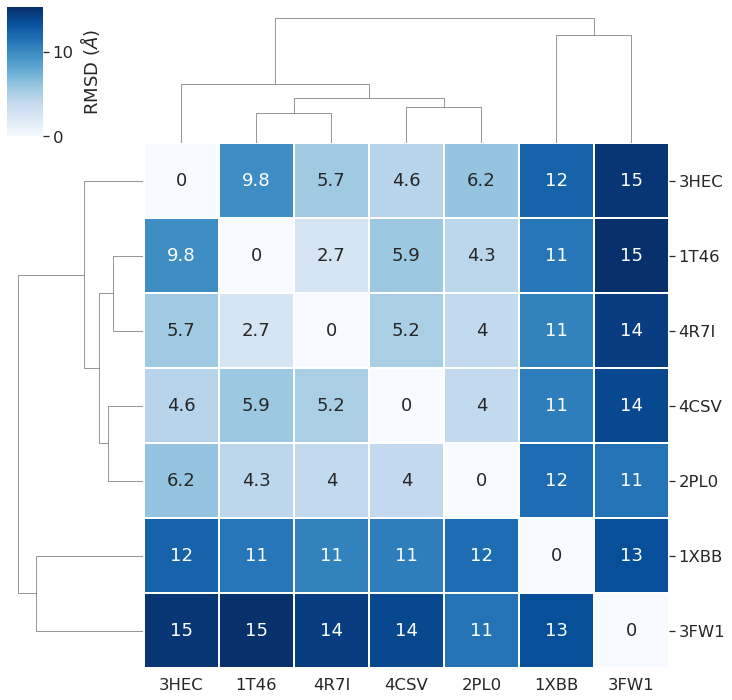

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [132]:
# Show the pairwise RMSD values as clustered heatmap
plot_clustermap(rmsd_matrix_bs, "bs")

RMSD values of aligned binding sites shows a dissimilarity of 3FW1 (EC number 1.10.5.1) within the dataset (EC number 2.7) - visual inspection in NGLView shows that STI is binding to the surface of the protein. The pairs 1XBB-4CVS and 1XBB-3HEC also show dissimilarities, whereas the rest of the dataset shows low RMSD values.

RMSD values as calculated here are dependend on the residue selection (binding site definition) and the quality of the a priori sequence alignment.

## Discussion

In this talktorial, we have used sequence alignment and subsequent RMSD refinement of whole protein structures and binding sites to assess the similarity and dissimilarity of a set of Imatinib-binding proteins. 
However, off-target prediction for Imatinib requires to compare the binding site of an intended target of Imatinib (a tyrosine kinase) with a large database of resolved structures (PDB). 
Since this results in the comparison of sequences also with low similarity, more sophisticated methods should be invoked
that use a sequence-independent alignment algorithm and that include the physico-chemical properties of the binding site in order to enable a more sophisticated search.

## Quiz

1. Explain the terms on- and off-targets of a drug.
2. Explain why binding site similarity can be used to find off-targets to a query target.
3. Discuss how useful the RMSD value of (i) whole proteins and (ii) protein binding sites is for off-target prediction.
4. Think of alternate approaches for binding site information (how to encode a binding site for binding site comparison?).